In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 530 images belonging to 2 classes.


In [25]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [26]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer and Pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) This is used for normal CNN
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='linear')) #This is used for SVM

In [27]:
## for mulitclassification
# cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
#              ='softmax'))
# cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [28]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [29]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
782/782 [==============================] - 71s 91ms/step - loss: 0.7734 - accuracy: 0.6396 - val_loss: 0.6492 - val_accuracy: 0.6906
Epoch 2/15
782/782 [==============================] - 72s 91ms/step - loss: 0.6206 - accuracy: 0.7126 - val_loss: 0.6180 - val_accuracy: 0.7755
Epoch 3/15
782/782 [==============================] - 71s 91ms/step - loss: 0.5574 - accuracy: 0.7422 - val_loss: 0.5429 - val_accuracy: 0.7755
Epoch 4/15
782/782 [==============================] - 72s 92ms/step - loss: 0.5219 - accuracy: 0.7593 - val_loss: 0.5007 - val_accuracy: 0.7868
Epoch 5/15
782/782 [==============================] - 73s 93ms/step - loss: 0.4960 - accuracy: 0.7722 - val_loss: 0.4698 - val_accuracy: 0.8132
Epoch 6/15
782/782 [==============================] - 73s 93ms/step - loss: 0.4766 - accuracy: 0.7792 - val_loss: 0.4524 - val_accuracy: 0.8075
Epoch 7/15
782/782 [==============================] - 74s 94ms/step - loss: 0.4610 - accuracy: 0.7868 - val_loss: 0.4837 - val_accuracy:

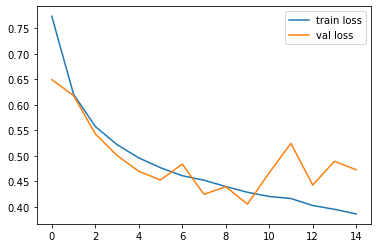

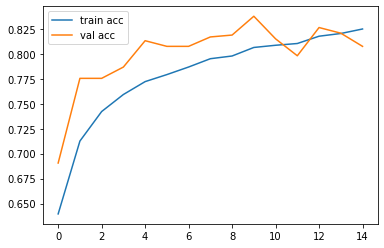

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
cnn.save('model_rcat_dog.h5')

In [32]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('mix_data/540.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
